# Clustering Analysis of Node Power Consumption Profiles in the Butter-E Dataset

Dataset Name: Butter-E Energy Consumption Data (node_power_dist.csv)<br>
Source: U.S. Government Open Data Portal<br>
URL: https://catalog.data.gov/dataset/butter-e-energy-consumption-data-for-the-butter-empirical-deep-learning-dataset<br>
Problem Type: Unsupervised Learning (Clustering)
- Identify distinct groups of nodes based on their power consumption patterns and percentile distributions.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

## 1. Data Loading and Initial Exploration

In [ ]:
# Load the dataset
def load_data(filepath):
    return pd.read_csv(filepath)

# Load data
df = load_data(r'E:\ML\data\node_power_dist.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])

# Summary statistics
df.describe()

Dataset Shape: (2636, 111)

Columns: ['node', 'count', 'min', 'p000001', 'p00001', 'p0001', 'p001', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p50', 'p51', 'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p60', 'p61', 'p62', 'p63', 'p64', 'p65', 'p66', 'p67', 'p68', 'p69', 'p70', 'p71', 'p72', 'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p80', 'p81', 'p82', 'p83', 'p84', 'p85', 'p86', 'p87', 'p88', 'p89', 'p90', 'p91', 'p92', 'p93', 'p94', 'p95', 'p96', 'p97', 'p98', 'p99', 'p999', 'p9999', 'p99999', 'p999999', 'max']

First 5 rows:

Missing values per column:
Series([], dtype: int64)


,count,min,p000001,p00001,p0001,p001,p1,p2,p3,p4,...,p95,p96,p97,p98,p99,p999,p9999,p99999,p999999,max
count,2636.000000,2636.000000,2636.000000,2636.00000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,...,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000
mean,247290.628604,127.914643,212.163885,212.16654,215.292868,216.915402,227.063354,227.549697,228.020106,228.418058,...,525.405159,528.424127,532.465478,538.323596,548.816009,579.339530,582.022382,584.335357,585.116085,617.797420
std,9456.605122,37.156880,41.640629,41.65165,39.202805,38.090943,28.416664,28.452927,28.431228,28.584157,...,49.289738,50.636412,52.481763,55.618410,60.159011,66.134287,66.149683,66.026208,65.968403,84.749699
min,7395.000000,9.000000,17.000000,17.00000,17.000000,17.000000,131.000000,131.000000,131.000000,131.000000,...,178.000000,179.000000,179.000000,179.000000,179.000000,180.000000,180.000000,181.000000,181.000000,213.000000
25%,248852.000000,122.000000,213.000000,213.00000,214.000000,215.000000,218.000000,218.000000,219.000000,219.000000,...,514.000000,517.000000,520.000000,524.000000,532.750000,560.000000,563.000000,565.750000,566.000000,596.000000
50%,248885.000000,128.000000,220.000000,220.00000,220.000000,220.000000,222.000000,222.000000,223.000000,223.000000,...,522.000000,524.000000,528.000000,532.000000,542.000000,572.000000,575.000000,577.000000,578.000000,606.000000
75%,248987.000000,132.000000,225.000000,225.00000,226.000000,226.000000,227.000000,228.000000,228.000000,228.000000,...,530.000000,532.000000,537.000000,543.000000,554.000000,587.000000,589.000000,592.000000,592.000000,618.000000
max,249598.000000,452.000000,454.000000,454.00000,454.000000,454.000000,504.000000,504.000000,504.000000,504.000000,...,919.000000,924.000000,930.000000,958.000000,998.000000,1022.000000,1022.000000,1022.000000,1022.000000,1358.000000


## 2. Data Preprocessing and cleaning

In [ ]:
def preprocess_data(df):
    # Create copy
    df_processed = df.copy()
    
    # Separate node names for later analysis
    node_names = df_processed['node']
    
    # Select features for clustering
    features_to_exclude = ['node', 'min', 'max', 'count']
    cluster_features = df_processed.drop(columns=features_to_exclude)
    
    # Handle any remaining missing values
    cluster_features = cluster_features.fillna(cluster_features.mean())
    
    return cluster_features, node_names

# Preprocess the data
features, node_names = preprocess_data(df)
print(f"Shape of features for clustering: {features.shape}")

# Scale the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
print(f"Shape of scaled features: {features_scaled.shape}")

Shape of features for clustering: (2636, 107)
Shape of scaled features: (2636, 107)


In [4]:
from sklearn.model_selection import train_test_split

# Split the data for validation of cluster stability

# training and testing
X_train, X_test, train_nodes, test_nodes = train_test_split(
    features_scaled, 
    node_names, 
    test_size=0.2, 
    random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Also get the complete original data for those indices
df_train = df.loc[train_nodes.index]
df_test = df.loc[test_nodes.index]


Training set shape: (2108, 107)
Testing set shape: (528, 107)


## 3.Exploratory Data Analysis

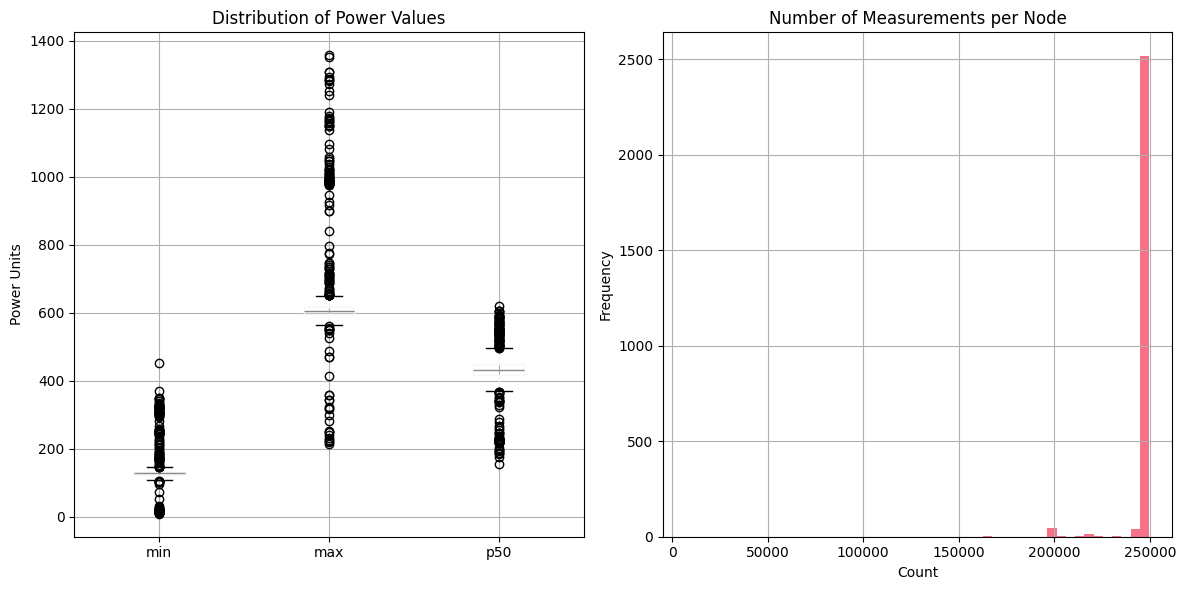

In [5]:
# Power Distribution Analysis

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df[['min', 'max', 'p50']].boxplot()
plt.title('Distribution of Power Values')
plt.ylabel('Power Units')

plt.subplot(1, 2, 2)
df['count'].hist(bins=50)
plt.title('Number of Measurements per Node')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

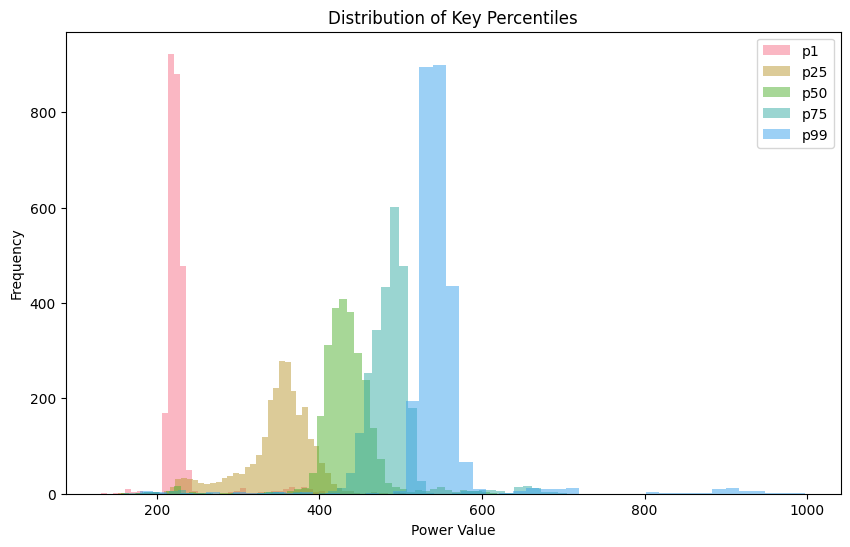

In [6]:
#Percentile Analysis

# Select key percentiles for visualization
key_percentiles = ['p1', 'p25', 'p50', 'p75', 'p99']

plt.figure(figsize=(10, 6))
for percentile in key_percentiles:
    plt.hist(df[percentile], bins=50, alpha=0.5, label=percentile)
plt.xlabel('Power Value')
plt.ylabel('Frequency')
plt.title('Distribution of Key Percentiles')
plt.legend()
plt.show()

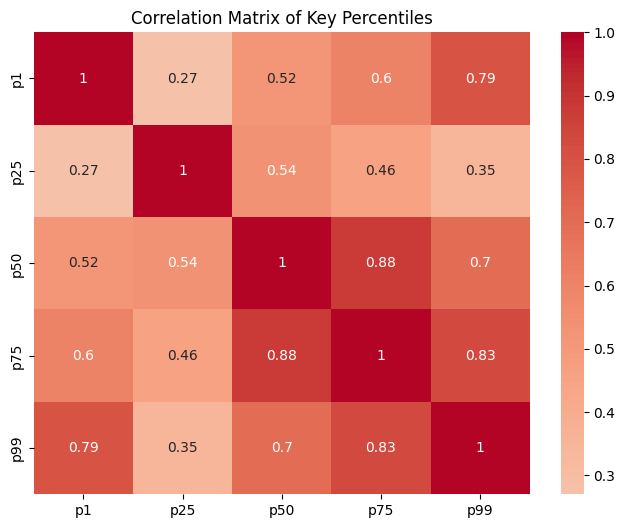

In [7]:
# Correlation Analysis

correlation_matrix = df[key_percentiles].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Percentiles')
plt.show()

## 4. Clustering Analysis

In [22]:
# K-means Clustering

def determine_optimal_clusters(features, max_k=10):
    range_n_clusters = range(2, max_k + 1)
    
    inertias = []
    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_scores = []
    
    for n_clusters in range_n_clusters:
        # Fit K-means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(features)
        
        # Calculate metrics
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(features, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(features, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(features, cluster_labels))
    
    # Plot metrics
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    axes[0, 0].plot(range_n_clusters, inertias, 'bo-')
    axes[0, 0].set_xlabel('Number of Clusters')
    axes[0, 0].set_ylabel('Inertia')
    axes[0, 0].set_title('Elbow Method')
    
    axes[0, 1].plot(range_n_clusters, silhouette_scores, 'bo-')
    axes[0, 1].set_xlabel('Number of Clusters')
    axes[0, 1].set_ylabel('Silhouette Score')
    axes[0, 1].set_title('Silhouette Analysis')
    
    axes[1, 0].plot(range_n_clusters, calinski_harabasz_scores, 'bo-')
    axes[1, 0].set_xlabel('Number of Clusters')
    axes[1, 0].set_ylabel('Calinski-Harabasz Score')
    axes[1, 0].set_title('Calinski-Harabasz Analysis')
    
    axes[1, 1].plot(range_n_clusters, davies_bouldin_scores, 'bo-')
    axes[1, 1].set_xlabel('Number of Clusters')
    axes[1, 1].set_ylabel('Davies-Bouldin Score')
    axes[1, 1].set_title('Davies-Bouldin Analysis')
    
    plt.tight_layout()
    plt.show()
    
    return range_n_clusters, silhouette_scores

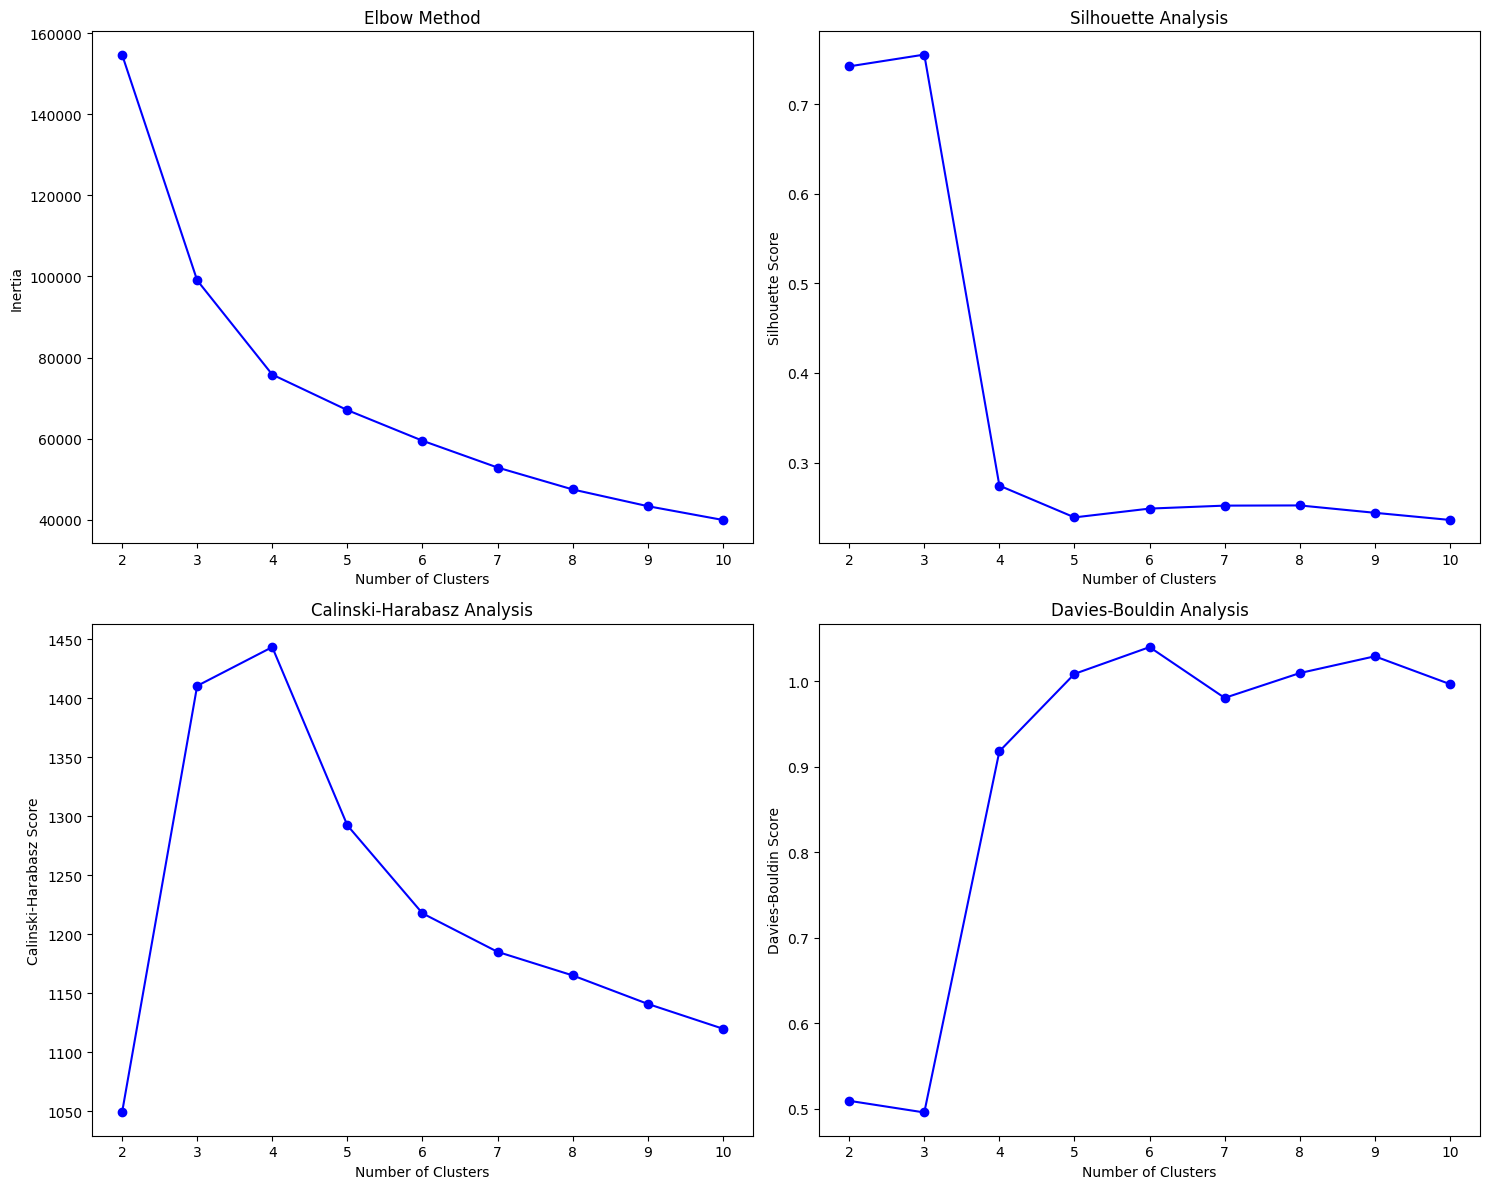

In [9]:
# Determine optimal number of clusters using training data
clusters_range, silhouette_scores = determine_optimal_clusters(X_train)

# Based on the analysis, let's use 5 clusters for K-means
n_clusters_kmeans = 5
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42, n_init=10)
kmeans_labels_train = kmeans.fit_predict(X_train)

# Predict on test set to validate cluster stability
kmeans_labels_test = kmeans.predict(X_test)

# Also get labels for the full dataset for visualization
kmeans_labels_full = kmeans.predict(features_scaled)

In [ ]:
# Gaussian Mixture Models

def find_optimal_gmm_components(features, max_components=10):
    range_n_components = range(2, max_components + 1)
    
    bic_scores = []
    aic_scores = []
    
    for n_components in range_n_components:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(features)
        
        bic_scores.append(gmm.bic(features))
        aic_scores.append(gmm.aic(features))
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(range_n_components, bic_scores, 'bo-', label='BIC')
    plt.plot(range_n_components, aic_scores, 'ro-', label='AIC')
    plt.xlabel('Number of Components')
    plt.ylabel('Information Criterion')
    plt.title('GMM Component Selection')
    plt.legend()
    plt.show()
    
    return range_n_components, bic_scores, aic_scores

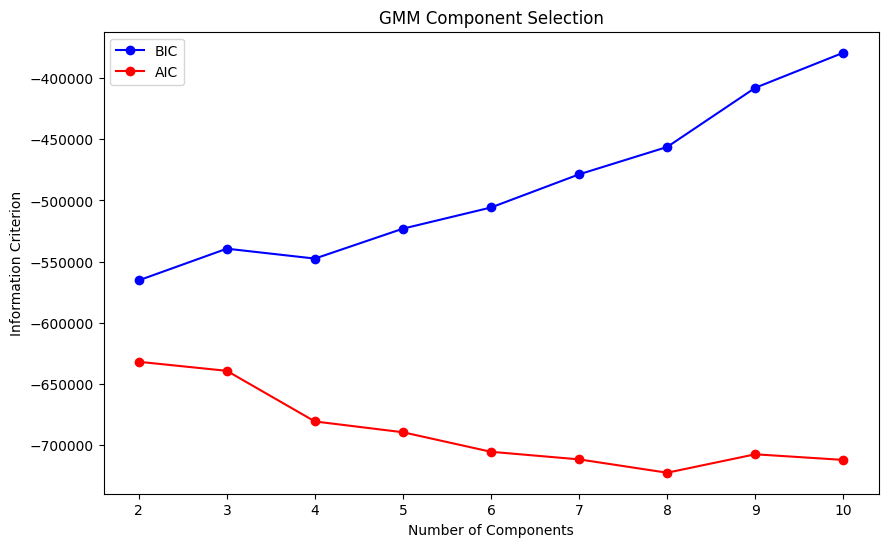

In [23]:
# Find optimal number of components using training data
components_range, bic_scores, aic_scores = find_optimal_gmm_components(X_train)

# Based on the analysis, let's use 5 components for GMM
n_components_gmm = 5
gmm = GaussianMixture(n_components=n_components_gmm, random_state=42)
gmm_labels_train = gmm.fit_predict(X_train)

# Predict on test set to validate cluster stability
gmm_labels_test = gmm.predict(X_test)

# Also get labels for the full dataset for visualization
gmm_labels_full = gmm.predict(features_scaled)


## 5. Cluster Visualization

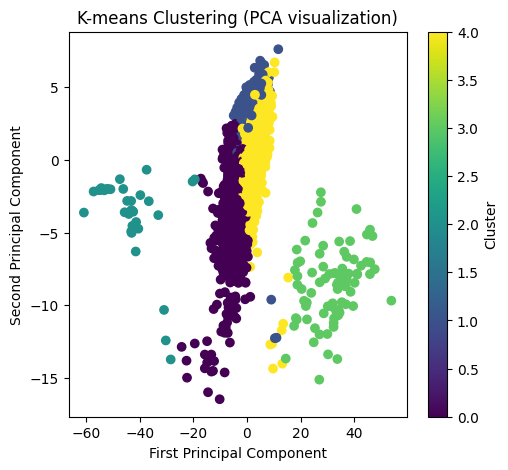

In [24]:
#PCA for Visualization

# Apply PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot K-means clusters (using full dataset for visualization)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_labels_full, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering (PCA visualization)')
plt.colorbar(scatter, label='Cluster')

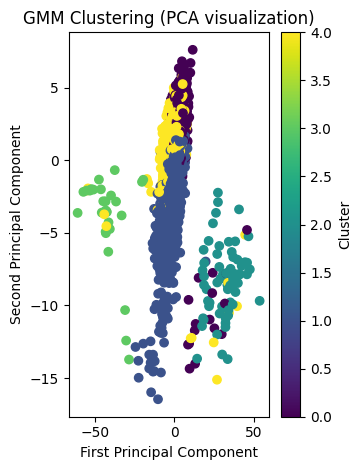

In [25]:
# Plot GMM clusters
plt.subplot(1, 2, 2)
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=gmm_labels_full, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('GMM Clustering (PCA visualization)')
plt.colorbar(scatter, label='Cluster')

plt.tight_layout()
plt.show()

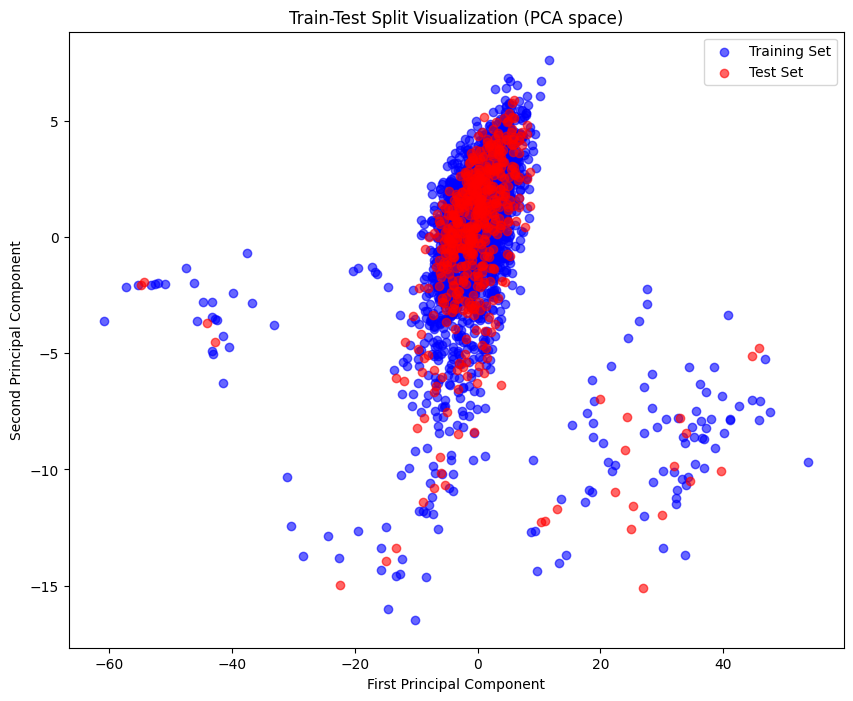

In [26]:
# Visualize train-test split in PCA space
plt.figure(figsize=(10, 8))
# Create PCA visualization with train/test split
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

# Plot train points
plt.scatter(pca_train[:, 0], pca_train[:, 1], c='blue', alpha=0.6, label='Training Set')
# Plot test points
plt.scatter(pca_test[:, 0], pca_test[:, 1], c='red', alpha=0.6, label='Test Set')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Train-Test Split Visualization (PCA space)')
plt.legend()
plt.show()

In [27]:
def analyze_cluster_characteristics(df, features, cluster_labels, cluster_name):
    """Analyze characteristics of each cluster"""
    df_cluster = df.copy()
    df_cluster['cluster'] = cluster_labels
    
    # Select only numeric columns for mean calculation
    numeric_cols = df_cluster.select_dtypes(include=['float64', 'int64']).columns
    
    # Calculate mean characteristics for each cluster
    cluster_means = df_cluster.groupby('cluster')[numeric_cols].mean()
    
    # Visualize key percentiles by cluster
    percentiles_to_plot = ['p1', 'p25', 'p50', 'p75', 'p99']
    n_plots = len(percentiles_to_plot)
    
    # Calculate number of rows and columns needed for subplots
    n_rows = (n_plots + 1) // 2  # Ceiling division
    n_cols = min(2, n_plots)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
    
    # Flatten axes array if we have multiple rows
    if n_rows > 1:
        axes = axes.flatten()
    
    # Create plots
    for i, percentile in enumerate(percentiles_to_plot):
        if n_rows == 1 and n_cols == 1:
            ax = axes
        elif n_rows == 1:
            ax = axes[i]
        else:
            ax = axes[i]
            
        for cluster in sorted(df_cluster['cluster'].unique()):
            data = df_cluster[df_cluster['cluster'] == cluster][percentile]
            ax.hist(data, bins=30, alpha=0.5, label=f'Cluster {cluster}')
        ax.set_xlabel('Power Value')
        ax.set_ylabel('Frequency')
        ax.set_title(f'{percentile} Distribution by Cluster')
        ax.legend()
    
    # Remove any unused subplots
    if n_rows > 1:
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
    
    plt.suptitle(f'Cluster Characteristics - {cluster_name}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Print cluster sizes and statistics
    print(f"\n{cluster_name} Cluster Sizes:")
    cluster_sizes = df_cluster['cluster'].value_counts().sort_index()
    print(cluster_sizes)
    
    # Print summary statistics for each cluster
    print("\nCluster Summary Statistics:")
    for cluster in sorted(df_cluster['cluster'].unique()):
        cluster_data = df_cluster[df_cluster['cluster'] == cluster]
        print(f"\nCluster {cluster} Statistics:")
        print(f"Size: {len(cluster_data)} nodes")
        print(f"Average power consumption (p50): {cluster_data['p50'].mean():.2f}")
        print(f"Power range: {cluster_data['min'].mean():.2f} to {cluster_data['max'].mean():.2f}")
    
    return cluster_means

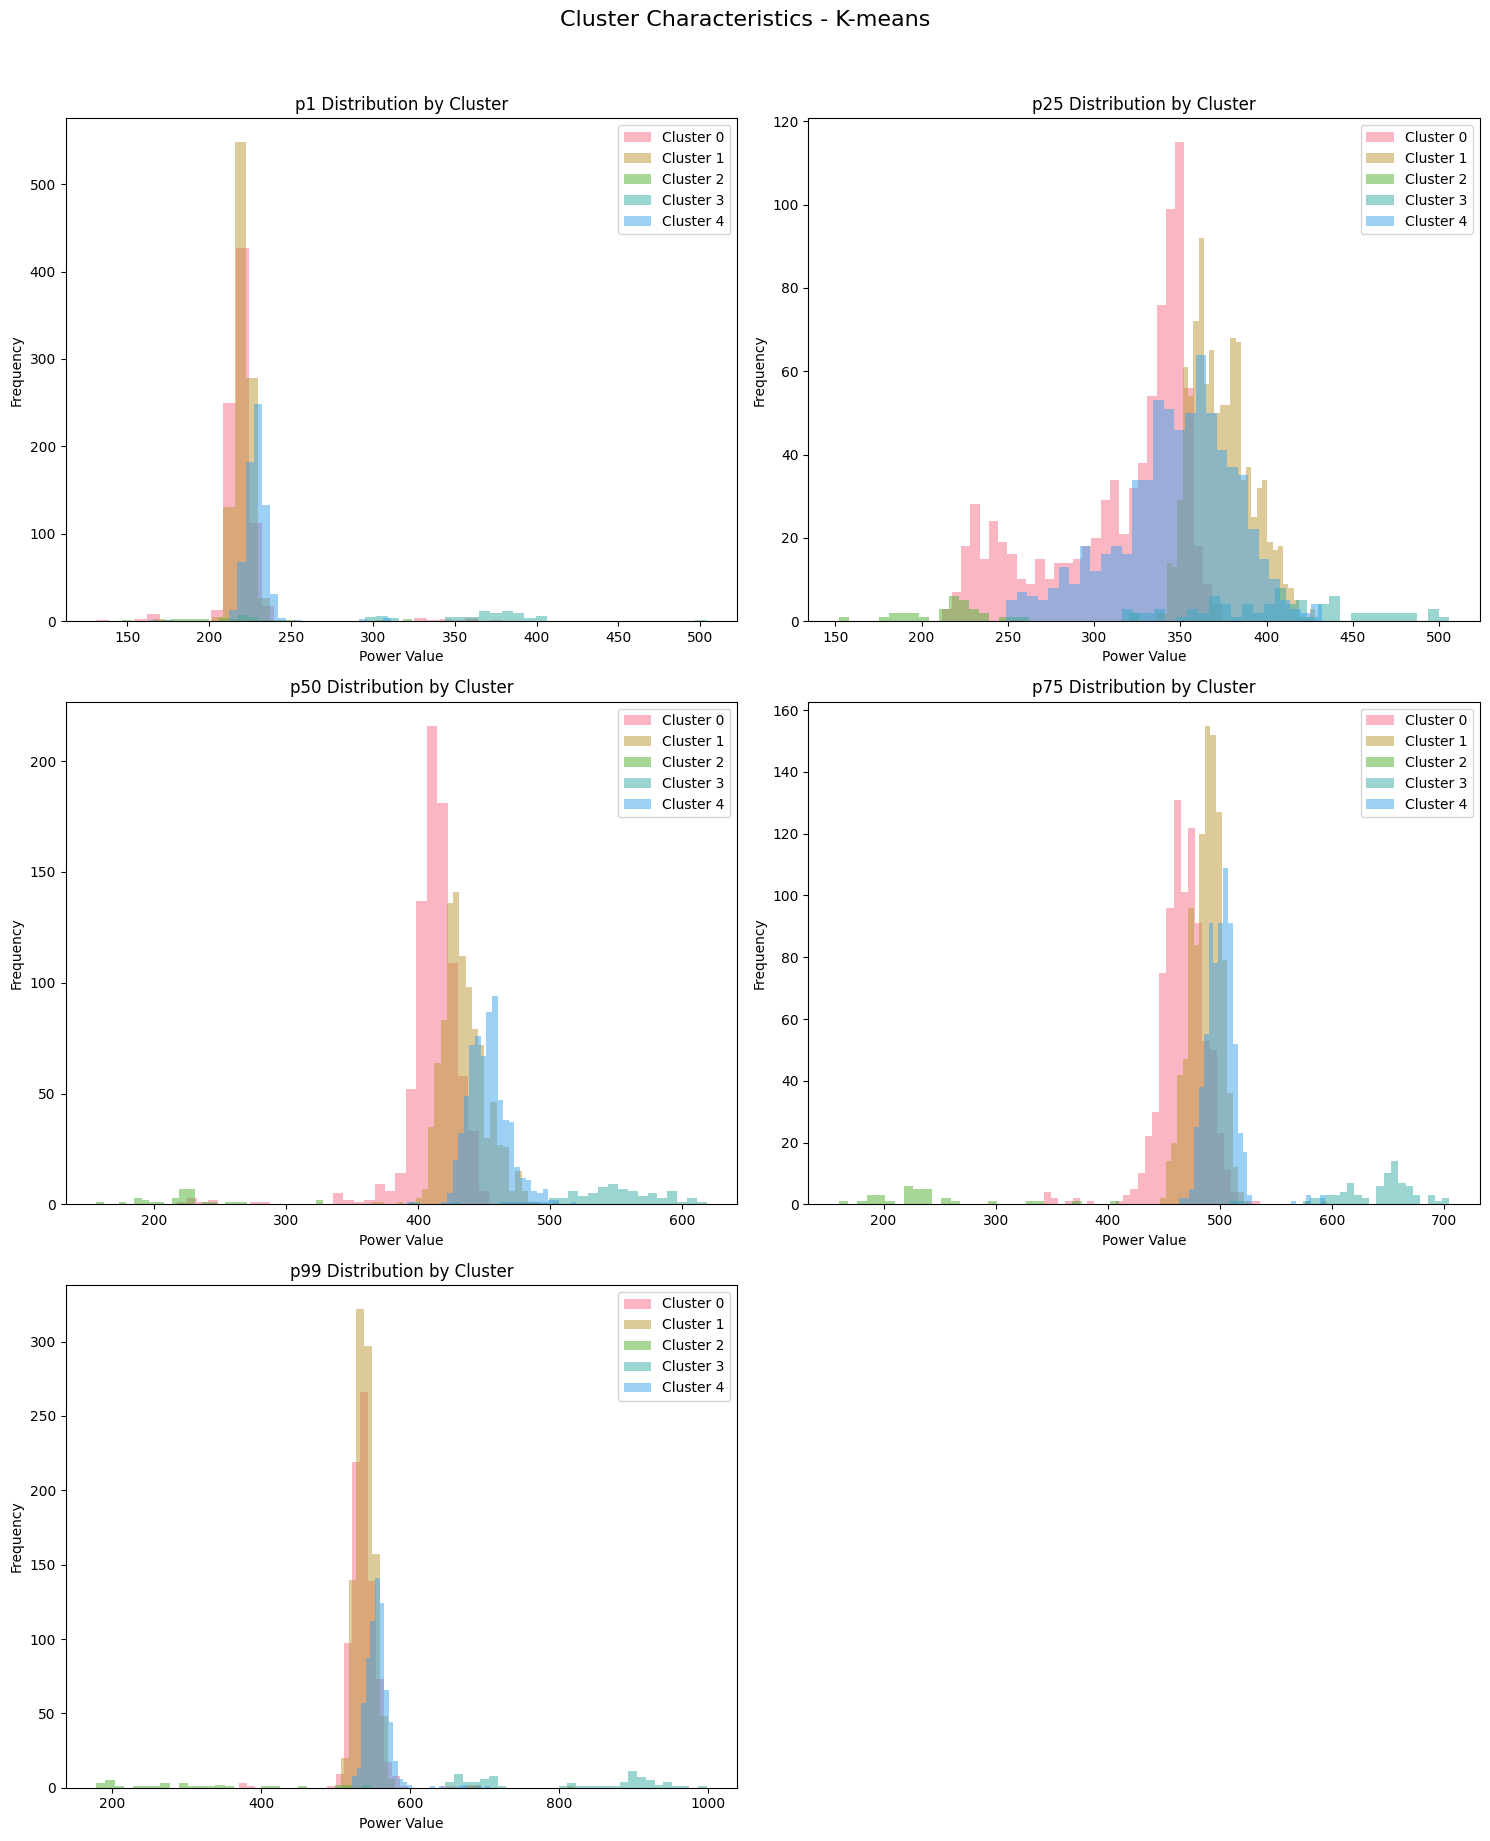


K-means Cluster Sizes:
cluster
0    840
1    993
2     33
3     81
4    689
Name: count, dtype: int64

Cluster Summary Statistics:

Cluster 0 Statistics:
Size: 840 nodes
Average power consumption (p50): 411.64
Power range: 122.28 to 605.69

Cluster 1 Statistics:
Size: 993 nodes
Average power consumption (p50): 434.79
Power range: 122.73 to 602.07

Cluster 2 Statistics:
Size: 33 nodes
Average power consumption (p50): 224.30
Power range: 168.00 to 410.94

Cluster 3 Statistics:
Size: 81 nodes
Average power consumption (p50): 545.06
Power range: 220.89 to 998.40

Cluster 4 Statistics:
Size: 689 nodes
Average power consumption (p50): 453.44
Power range: 129.41 to 620.39


In [28]:
# Analyze K-means clusters (using full dataset for complete analysis)
kmeans_cluster_means = analyze_cluster_characteristics(df, features, kmeans_labels_full, 'K-means')

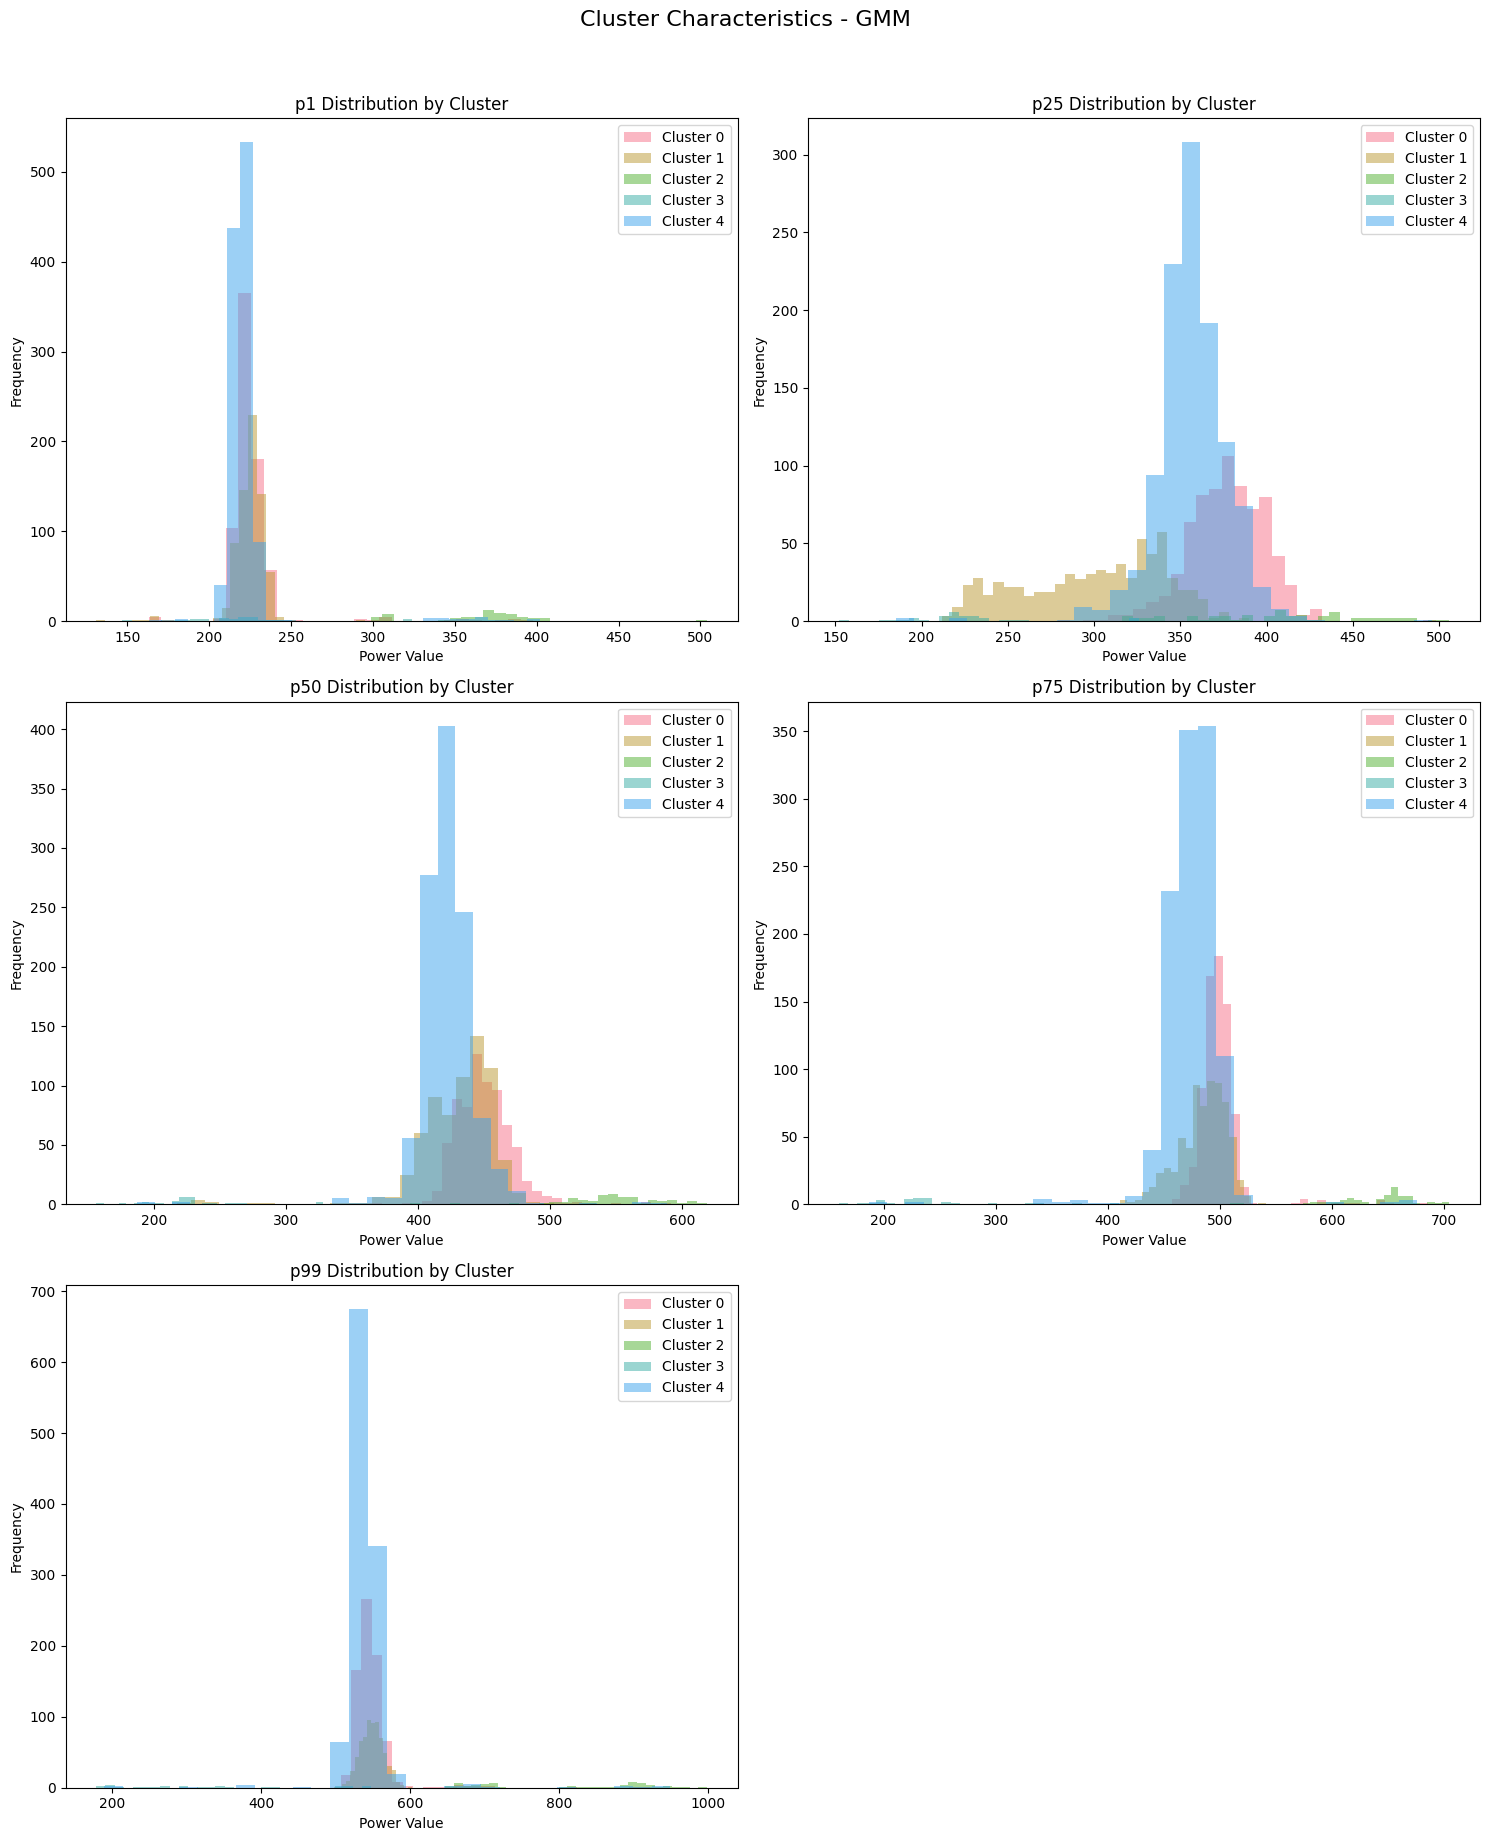


GMM Cluster Sizes:
cluster
0     730
1     689
2      66
3      29
4    1122
Name: count, dtype: int64

Cluster Summary Statistics:

Cluster 0 Statistics:
Size: 730 nodes
Average power consumption (p50): 450.17
Power range: 126.02 to 611.87

Cluster 1 Statistics:
Size: 689 nodes
Average power consumption (p50): 430.62
Power range: 126.06 to 615.09

Cluster 2 Statistics:
Size: 66 nodes
Average power consumption (p50): 546.91
Power range: 221.59 to 991.73

Cluster 3 Statistics:
Size: 29 nodes
Average power consumption (p50): 226.83
Power range: 170.41 to 409.90

Cluster 4 Statistics:
Size: 1122 nodes
Average power consumption (p50): 422.02
Power range: 123.68 to 606.70


In [29]:
# Analyze GMM clusters
gmm_cluster_means = analyze_cluster_characteristics(df, features, gmm_labels_full, 'GMM')

## 6. Cluster Evaluation

In [30]:
#Evaluation Metrics

def evaluate_clustering(features, labels, algorithm_name):
    print(f"\n{algorithm_name} Clustering Evaluation:")
    print(f"Silhouette Score: {silhouette_score(features, labels):.3f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_score(features, labels):.3f}")
    print(f"Davies-Bouldin Score: {davies_bouldin_score(features, labels):.3f}")

In [31]:
# Evaluate both clustering approaches on training set
print("Training Set Evaluation:")
evaluate_clustering(X_train, kmeans_labels_train, "K-means")
evaluate_clustering(X_train, gmm_labels_train, "GMM")

Training Set Evaluation:

K-means Clustering Evaluation:
Silhouette Score: 0.239
Calinski-Harabasz Score: 1292.293
Davies-Bouldin Score: 1.009

GMM Clustering Evaluation:
Silhouette Score: 0.155
Calinski-Harabasz Score: 1089.772
Davies-Bouldin Score: 1.251


In [32]:
# Evaluate on test set
print("\nTest Set Evaluation:")
evaluate_clustering(X_test, kmeans_labels_test, "K-means")
evaluate_clustering(X_test, gmm_labels_test, "GMM")


Test Set Evaluation:

K-means Clustering Evaluation:
Silhouette Score: 0.241
Calinski-Harabasz Score: 310.635
Davies-Bouldin Score: 1.001

GMM Clustering Evaluation:
Silhouette Score: 0.108
Calinski-Harabasz Score: 42.978
Davies-Bouldin Score: 2.196



K-means Cluster Stability Analysis:
Cluster size distribution comparison:
      Train      Test
0  0.317362  0.323864
1  0.379507  0.365530
2  0.013757  0.007576
3  0.031309  0.028409
4  0.258065  0.274621


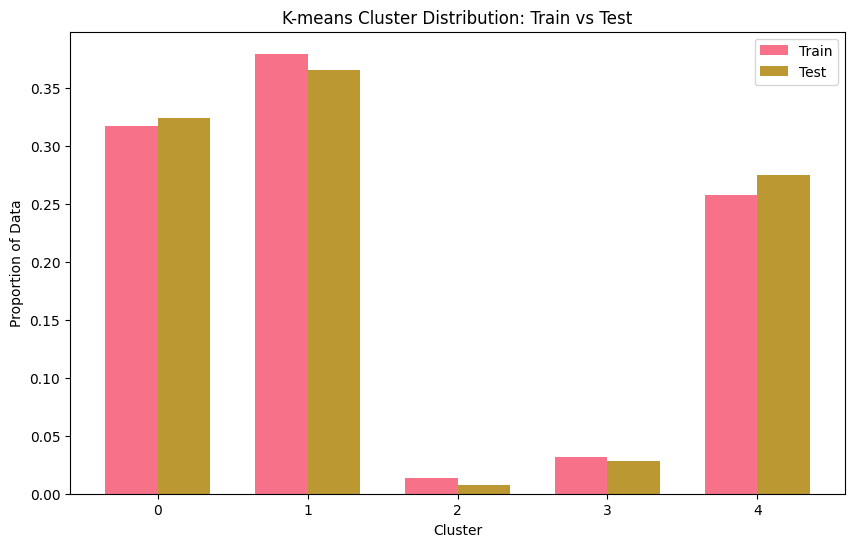


GMM Cluster Stability Analysis:
Cluster size distribution comparison:
      Train      Test
0  0.287951  0.232955
1  0.257590  0.276515
2  0.031309       NaN
3  0.013757       NaN
4  0.409393  0.490530


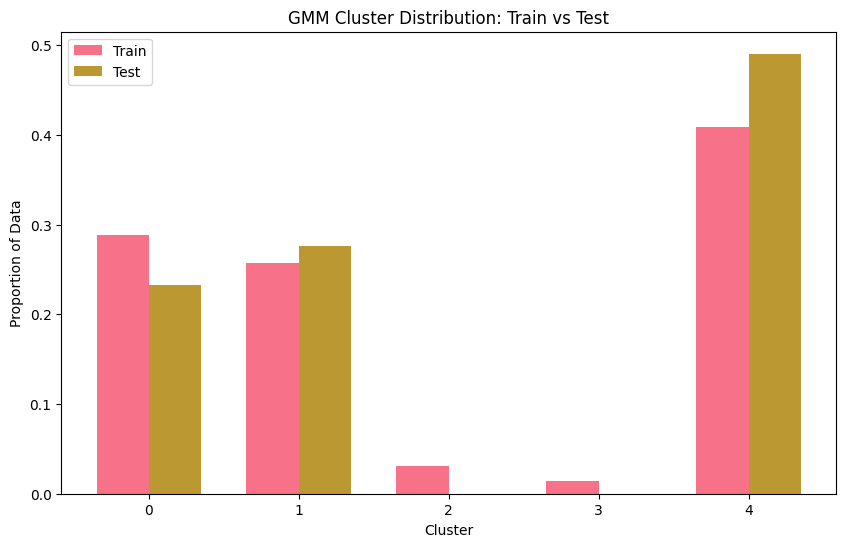

In [33]:
# Cluster Stability Analysis

from sklearn.metrics import adjusted_rand_score

# Compare cluster assignments between train and test sets
def analyze_cluster_stability(train_labels, test_labels, algorithm_name):
    # We need to compare distributions, not individual labels
    train_cluster_sizes = pd.Series(train_labels).value_counts(normalize=True).sort_index()
    test_cluster_sizes = pd.Series(test_labels).value_counts(normalize=True).sort_index()
    
    print(f"\n{algorithm_name} Cluster Stability Analysis:")
    print("Cluster size distribution comparison:")
    comparison_df = pd.DataFrame({
        'Train': train_cluster_sizes,
        'Test': test_cluster_sizes
    })
    print(comparison_df)
    
    # Visualize cluster stability
    plt.figure(figsize=(10, 6))
    x = range(len(comparison_df))
    width = 0.35
    plt.bar(x, comparison_df['Train'], width, label='Train')
    plt.bar([i + width for i in x], comparison_df['Test'], width, label='Test')
    plt.xlabel('Cluster')
    plt.ylabel('Proportion of Data')
    plt.title(f'{algorithm_name} Cluster Distribution: Train vs Test')
    plt.legend()
    plt.xticks([i + width/2 for i in x], comparison_df.index)
    plt.show()

# Analyze stability for both algorithms
analyze_cluster_stability(kmeans_labels_train, kmeans_labels_test, "K-means")
analyze_cluster_stability(gmm_labels_train, gmm_labels_test, "GMM")

In [34]:
# Node Type Analysis

# Extract node types from node names
def extract_node_type(node_name):
    import re
    match = re.match(r'^([a-zA-Z]+)', node_name)
    return match.group(1) if match else 'unknown'

df['node_type'] = df['node'].apply(extract_node_type)


<Figure size 1000x600 with 0 Axes>

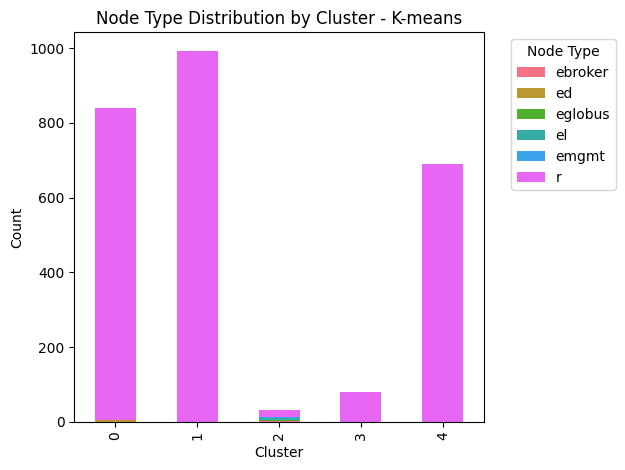

<Figure size 1000x600 with 0 Axes>

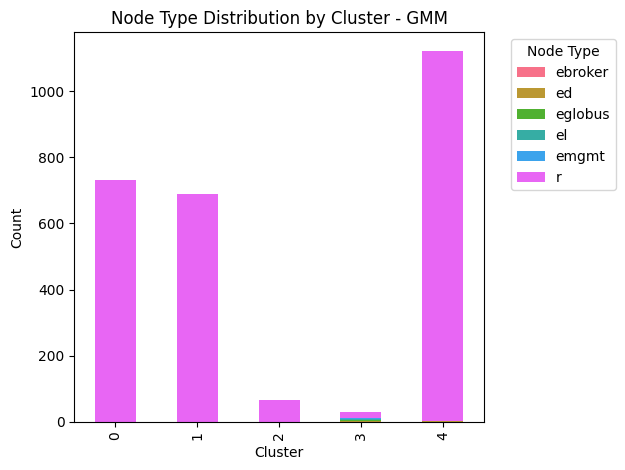

In [35]:
def visualize_cluster_node_types(df, labels, algorithm_name):
    """Visualize the distribution of node types across clusters"""
    df_cluster = df.copy()
    df_cluster['cluster'] = labels
    
    cluster_node_type = pd.crosstab(df_cluster['cluster'], df_cluster['node_type'])
    
    plt.figure(figsize=(10, 6))
    cluster_node_type.plot(kind='bar', stacked=True)
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.title(f'Node Type Distribution by Cluster - {algorithm_name}')
    plt.legend(title='Node Type', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Visualize for both clustering approaches using the full dataset labels
visualize_cluster_node_types(df, kmeans_labels_full, 'K-means')
visualize_cluster_node_types(df, gmm_labels_full, 'GMM')

## 7. Conclusions and Insights

In [36]:
# Save cluster assignments for further analysis
df_results = df.copy()
df_results['kmeans_cluster'] = kmeans_labels_full
df_results['gmm_cluster'] = gmm_labels_full


In [38]:
# Print cluster profiles
print("\nK-means Cluster Profiles:")
for cluster in range(n_clusters_kmeans):
    mask = kmeans_labels_full == cluster
    avg_power = df[mask][['p1', 'p50', 'p99']].mean()
    print(f"\nCluster {cluster}:")
    print(f"  Average p1: {avg_power['p1']:.2f}")
    print(f"  Average p50: {avg_power['p50']:.2f}")
    print(f"  Average p99: {avg_power['p99']:.2f}")
    print(f"  Size: {mask.sum()} nodes")





K-means Cluster Profiles:

Cluster 0:
  Average p1: 219.84
  Average p50: 411.64
  Average p99: 537.22
  Size: 840 nodes

Cluster 1:
  Average p1: 220.70
  Average p50: 434.79
  Average p99: 539.78
  Size: 993 nodes

Cluster 2:
  Average p1: 217.30
  Average p50: 224.30
  Average p99: 322.12
  Size: 33 nodes

Cluster 3:
  Average p1: 365.07
  Average p50: 545.06
  Average p99: 804.36
  Size: 81 nodes

Cluster 4:
  Average p1: 229.28
  Average p50: 453.44
  Average p99: 556.80
  Size: 689 nodes


In [39]:
print("\nGMM Cluster Profiles:")
for cluster in range(n_components_gmm):
    mask = gmm_labels_full == cluster
    avg_power = df[mask][['p1', 'p50', 'p99']].mean()
    print(f"\nCluster {cluster}:")
    print(f"  Average p1: {avg_power['p1']:.2f}")
    print(f"  Average p50: {avg_power['p50']:.2f}")
    print(f"  Average p99: {avg_power['p99']:.2f}")
    print(f"  Size: {mask.sum()} nodes")


GMM Cluster Profiles:

Cluster 0:
  Average p1: 225.75
  Average p50: 450.17
  Average p99: 547.97
  Size: 730 nodes

Cluster 1:
  Average p1: 224.83
  Average p50: 430.62
  Average p99: 549.26
  Size: 689 nodes

Cluster 2:
  Average p1: 364.26
  Average p50: 546.91
  Average p99: 805.47
  Size: 66 nodes

Cluster 3:
  Average p1: 219.38
  Average p50: 226.83
  Average p99: 327.17
  Size: 29 nodes

Cluster 4:
  Average p1: 221.42
  Average p50: 422.02
  Average p99: 539.73
  Size: 1122 nodes
